<a href="https://colab.research.google.com/github/AkerkeKesha/stacked-unets/blob/main/gcolab_etci_flood_semantic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Set up plotting options
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
gdrive_root = '/content/drive/MyDrive/stacked-unet/dataset/etci-flood-dataset'
gdrive_root

'/content/drive/MyDrive/stacked-unet/dataset/etci-flood-dataset'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/AkerkeKesha/stacked-unets.git

Cloning into 'stacked-unets'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (340/340), done.
remote: Compressing objects: 100% (208/208), done.
remote: Total 340 (delta 213), reused 248 (delta 125), pack-reused 0
Receiving objects: 100% (340/340), 2.09 MiB | 7.32 MiB/s, done.
Resolving deltas: 100% (213/213), done.


In [ ]:
%cd stacked-unets

/content/stacked-unets


In [ ]:
%pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 KB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━

In [ ]:
!mkdir -p /content/stacked-unets/dataset/data-etci-flood

!unzip -q $gdrive_root/train.zip -d /content/stacked-unets/dataset/data-etci-flood
!unzip -q $gdrive_root/test.zip  -d /content/stacked-unets/dataset/data-etci-flood

In [ ]:
!mkdir output

!mv /content/stacked-unets/dataset/data-etci-flood/val /content/stacked-unets/dataset/data-etci-flood/test_internal

In [ ]:
!mkdir output/etci_labels

# Couple check ups

In [ ]:
%pwd

'/content'

In [ ]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead")

GPU is available


In [ ]:
import sys

sys.path.append('/content/stacked-unets/src')

In [ ]:
import os 
from glob import glob
import config


train_dir = config.train_dir
valid_dir = config.test_dir

print(f"Is colab: {config.is_colab}")

print(f"Number of training temporal-regions: {len(glob(train_dir+'/*/'))}")
print(f"Number of testing temporal-regions: {len(glob(valid_dir+'/*/'))}")

Is colab: True
Number of training temporal-regions: 31
Number of testing temporal-regions: 10


0 images could not have binary masks saved/generated.
Original:(33405, 5)
Cleaned up:(25024, 5)
Split into train:(20368, 5) and valid:(4656, 5)
Epoch: [1 / 5]


  0%|          | 0/213 [00:00<?, ?it/s]

Train mean IoU = 0.4895
Train mean loss = 0.0843


  0%|          | 0/49 [00:00<?, ?it/s]

Val mean IoU = 0.4817
Val mean loss = 0.1494
Epoch: [2 / 5]


  0%|          | 0/213 [00:00<?, ?it/s]

Train mean IoU = 0.4911
Train mean loss = 0.0626


  0%|          | 0/49 [00:00<?, ?it/s]

Val mean IoU = 0.4817
Val mean loss = 0.1249
Epoch: [3 / 5]


  0%|          | 0/213 [00:00<?, ?it/s]

Train mean IoU = 0.4913
Train mean loss = 0.0598


  0%|          | 0/49 [00:00<?, ?it/s]

Val mean IoU = 0.4817
Val mean loss = 0.1447
Epoch: [4 / 5]


  0%|          | 0/213 [00:00<?, ?it/s]

Train mean IoU = 0.4912
Train mean loss = 0.0581


  0%|          | 0/49 [00:00<?, ?it/s]

Val mean IoU = 0.4817
Val mean loss = 0.1292
Epoch: [5 / 5]


  0%|          | 0/213 [00:00<?, ?it/s]

Train mean IoU = 0.4912
Train mean loss = 0.0566


  0%|          | 0/49 [00:00<?, ?it/s]

Val mean IoU = 0.4822
Val mean loss = 0.1372
2246.289766073227 seconds to train
Done saving average losses
Done saving evaluation metrics


TypeError: ignored

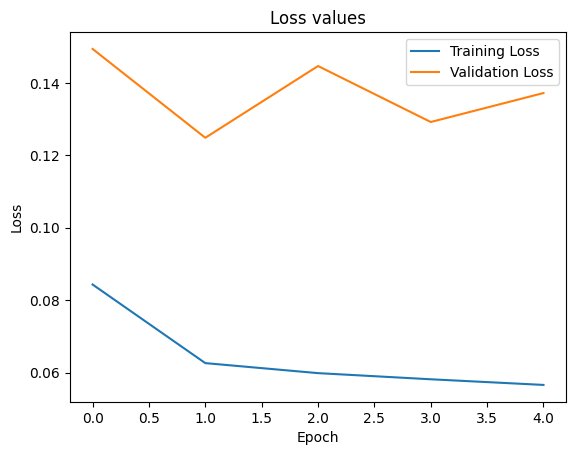

In [ ]:
from src.main import start_basic_unet

start_basic_unet()

In [ ]:
!cp output/train_losses.npy "/content/drive/MyDrive/stacked-unet/output/train_losses.npy"
!cp output/val_losses.npy "/content/drive/MyDrive/stacked-unet/output/val_losses.npy"
!cp output/single_unet.pt "/content/drive/MyDrive/stacked-unet/output/single_unet.pt"
!cp output/predictions.npy "/content/drive/MyDrive/stacked-unet/output/predictions.npy"
!cp output/loss_plot.png "/content/drive/MyDrive/stacked-unet/output/loss_plot.png"
!cp output/iou_plot.png "/content/drive/MyDrive/stacked-unet/output/iou_plot.png"
!cp output/train_iou.npy "/content/drive/MyDrive/stacked-unet/output/train_iou.npy"
!cp output/val_iou.npy "/content/drive/MyDrive/stacked-unet/output/val_iou.npy"

In [ ]:
!zip -r output/etci_labels.zip  output/etci_labels

Streaming output truncated to the last 5000 lines.
  adding: output/etci_labels/florence_20180709t231346_x-10_y-23_vv_visualization.png (deflated 3%)
  adding: output/etci_labels/florence_20180802t231348_x-7_y-12_vv_visualization.png (deflated 2%)
  adding: output/etci_labels/florence_20180802t231348_x-12_y-35_vv_visualization.png (deflated 2%)
  adding: output/etci_labels/florence_20180709t231346_x-4_y-32_vv_visualization.png (deflated 2%)
  adding: output/etci_labels/florence_20180721t231347_x-7_y-26_vv_visualization.png (deflated 3%)
  adding: output/etci_labels/florence_20180709t231346_x-17_y-5_vv_visualization.png (deflated 2%)
  adding: output/etci_labels/florence_20181001t231350_x-8_y-7_vv_visualization.png (deflated 3%)
  adding: output/etci_labels/florence_20180802t231348_x-10_y-31_vv_visualization.png (deflated 3%)
  adding: output/etci_labels/florence_20180907t231350_x-7_y-7_vv_visualization.png (deflated 3%)
  adding: output/etci_labels/florence_20181001t231350_x-3_y-19_vv_

In [ ]:
!cp etci_labels.zip "/content/drive/MyDrive/stacked-unet/output/etci_labels.zip"